# **Modeling Data Using a Graph.**

In this example we explore using NetworkX to build graphs based on related data. Below are some examples that illustrate how to build a graph using this package.

Run these examples and confirm that you have NetworkX correctly installed. Then complete questions 1 - 4 below.

It is recommended that you upload and run this notebook on [Colab](https://colab.research.google.com/)

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
G = nx.Graph()
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(1, 5)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(4, 5)



In [3]:
# explicitly set positions
pos = {1: (0, 0), 2: (-1, 0.3), 3: (2, 0.17), 4: (4, 0.255), 5: (5, 0.03)}

options = {
    "font_size": 36,
    "node_size": 3000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 5,
    "width": 5,
}


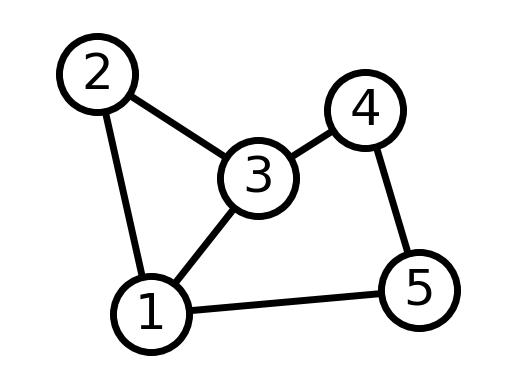

In [4]:
nx.draw_networkx(G, pos, **options)
# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

# Now try building a directed Graph

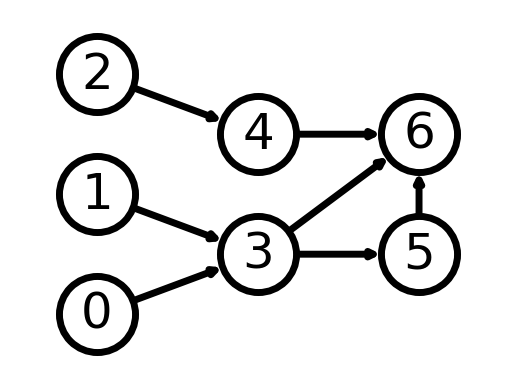

In [6]:
G = nx.DiGraph([(0, 3), (1, 3), (2, 4), (3, 5), (3, 6), (4, 6), (5, 6)])

# group nodes by column
left_nodes = [0, 1, 2]
middle_nodes = [3, 4]
right_nodes = [5, 6]

# set the position according to column (x-coord)
pos = {n: (0, i) for i, n in enumerate(left_nodes)}
pos.update({n: (1, i + 0.5) for i, n in enumerate(middle_nodes)})
pos.update({n: (2, i + 0.5) for i, n in enumerate(right_nodes)})

nx.draw_networkx(G, pos, **options)

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

**Modeling Twitter Network.**

In this exercise we will model and analyze example X (Twitter )social network data. Assume we have information about a small network of Twitter users -- specifically who each user "follows". Thus we are modeling the "follows" relation using a graph.

Using the following data table below complete the stated questions.


- Dan follows Jane, Bob, Sally, Sam, Tiana, Juan, and Wei
- Wei follows Dan, Bob, and Sam
- Bob follows Jane, Wei, and Tiana
- Tiana follows Jane and Juan
- Sally follows Bob
- Jane follows Juan and Wei
- Juan follows Sally and Jane
- Sam follows Jane

NOTE: If you have any questions about syntax or function names, search the docs. There is a search bar in the upper right of this page:

https://networkx.org/documentation/stable/reference/index.html







## Question 1.

Would you use a undirected graph or a directed graph to model this data? Explain.

AI would use a directed graph because the relationship of followers and followed are directional. There may be one-sided follower where user a follows user b but user b doesn't follow user a back. 

## Question 2.

Create this graph using NetworkX and plot the resulting graph.

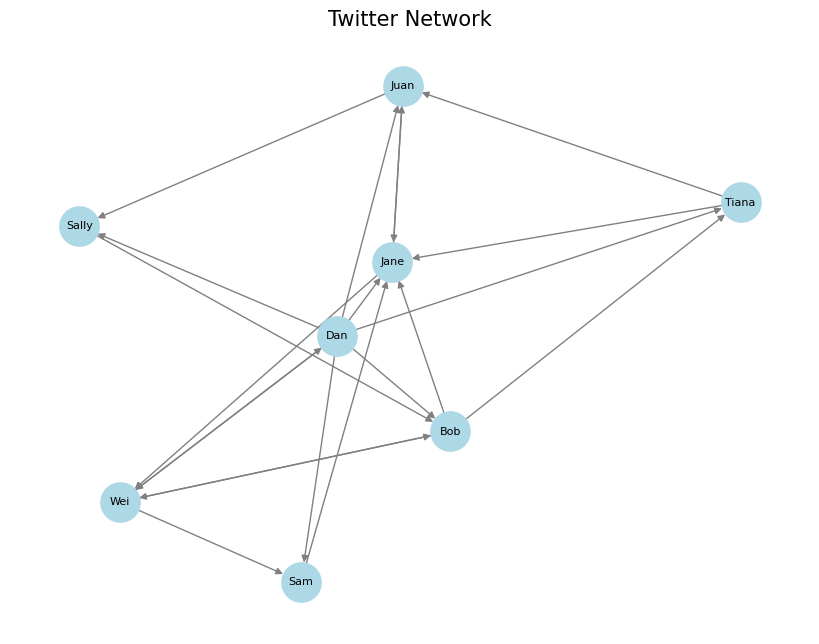

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
edges = [
    ("Dan", "Jane"), ("Dan", "Bob"), ("Dan", "Sally"), ("Dan", "Sam"), ("Dan", "Tiana"), ("Dan", "Juan"), ("Dan", "Wei"),
    ("Wei", "Dan"), ("Wei", "Bob"), ("Wei", "Sam"),
    ("Bob", "Jane"), ("Bob", "Wei"), ("Bob", "Tiana"),
    ("Tiana", "Jane"), ("Tiana", "Juan"),
    ("Sally", "Bob"),
    ("Jane", "Juan"), ("Jane", "Wei"),
    ("Juan", "Sally"), ("Juan", "Jane"),
    ("Sam", "Jane")
]

G.add_edges_from(edges)

plt.figure(figsize=(8,6))
nx.draw(G, with_labels=True, node_size=800, node_color='lightblue', edge_color='gray', font_size=8)
plt.title("Twitter Network", fontsize=15)
plt.show()



## Question 3.

Assume you wanted to determine which user was the biggest "social influencer". Which graph measure would you compute and why?

The graph measure I want to compute is the in-degree centrality because it measures the amount of incoming edges to a node which shows how many followers the user has. The higher the number is means that there is more people following them indicating they are a social influencer. 

## Question 4.

Compute the measure chosen and determine who in this example was the biggest social influencer. See example below which analyzes facebook social network data. You will need to have data file facebook_combined.txt to complete this example.

In [13]:
in_degree_centrality = nx.in_degree_centrality(G)

biggest_influencer = max(in_degree_centrality, key=in_degree_centrality.get)
influence_score = in_degree_centrality[biggest_influencer]

print("In-Degree Centrality for each user:")
for user, centrality in in_degree_centrality.items():
    print(f"{user}: {centrality:.2f}")

print(f"\nThe biggest social influencer is {biggest_influencer}.")

In-Degree Centrality for each user:
Dan: 0.14
Jane: 0.71
Bob: 0.43
Sally: 0.29
Sam: 0.29
Tiana: 0.29
Juan: 0.43
Wei: 0.43

The biggest social influencer is Jane.
